In [1]:
%matplotlib inline

10. Skip Finetuning by reusing part of pre-trained model
===========================================================

There is a dilemma that pre-trained public dataset detection models need finetuning
before we can apply them to our interested domain.
While it is still a chanllenging
task, in this tutorial we showcase a very interesting way to reuse pre-trained models.

Basically, you can grab a GluonCV pre-trained detection model and reset classes to a subset of
coco categories, and it will be instantly ready to use without any tuning.

First let's import some necessary libraries:



In [2]:
from matplotlib import pyplot as plt
import gluoncv
from gluoncv import model_zoo, data, utils

Load a pretrained model
-------------------------

Let's get an Faster RCNN model trained on COCO
dataset with ResNet-50 backbone.



In [3]:
net = model_zoo.get_model('faster_rcnn_resnet50_v1b_coco', pretrained=True)

Pre-process an image
--------------------
Similar to faster rcnn inference tutorial, we grab and preprocess a demo image



In [4]:
im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/' +
                          'gluoncv/detection/biking.jpg?raw=true',
                          path='images/biking.jpg')
x, orig_img = data.transforms.presets.rcnn.load_test(im_fname)

100%|███████████████████████████████████████████████████████████████████████████████| 244/244 [00:00<00:00, 320.72KB/s]


Reset classes to exactly what we want
-------------------------------------
Original COCO model has 80 classes



In [5]:
print('coco classes: ', net.classes)
net.reset_class(classes=['bicycle', 'backpack'], reuse_weights=['bicycle', 'backpack'])
# now net has 2 classes as desired
print('new classes: ', net.classes)

coco classes:  ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
new classes:  ['bicycle', 'backpack']


Inference and display
---------------------



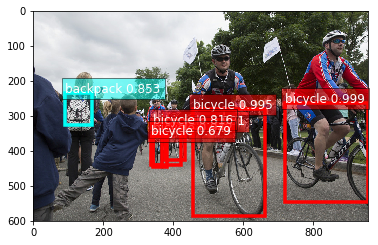

In [6]:
box_ids, scores, bboxes = net(x)
ax = utils.viz.plot_bbox(orig_img, bboxes[0], scores[0], box_ids[0], class_names=net.classes)

plt.show()

More flexible mapping strategy for reusing old weights
------------------------------------------------------
We also support dict for 1-to-1 class weights re-mapping
So we can take advantage of this to remap some categories



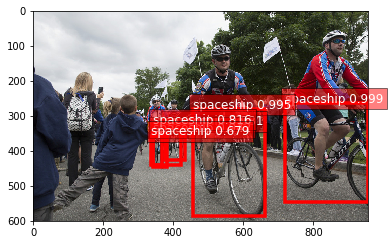

In [7]:
net = model_zoo.get_model('faster_rcnn_resnet50_v1b_coco', pretrained=True)
net.reset_class(classes=['spaceship'], reuse_weights={'spaceship':'bicycle'})
box_ids, scores, bboxes = net(x)
ax = utils.viz.plot_bbox(orig_img, bboxes[0], scores[0], box_ids[0], class_names=net.classes)

plt.show()

The same story for different models
--------------------------------------------------------
We can apply this strategy to SSD, YOLO and Mask-RCNN models
Now we can use mask rcnn and reset class to detect person only



In [9]:
net = model_zoo.get_model('mask_rcnn_resnet50_v1b_coco', pretrained=True)
net.reset_class(classes=['person'], reuse_weights=['person'])
ids, scores, bboxes, masks = [xx[0].asnumpy() for xx in net(x)]

# paint segmentation mask on images directly
width, height = orig_img.shape[1], orig_img.shape[0]
masks = utils.viz.expand_mask(masks, bboxes, (width, height), scores)
orig_img = utils.viz.plot_mask(orig_img, masks)

# identical to Faster RCNN object detection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax = utils.viz.plot_bbox(orig_img, bboxes, scores, ids,
                         class_names=net.classes, ax=ax)
plt.show()

Model file is not found. Downloading.



  1%|▍                                                                         | 760/131497 [02:41<33:11:44,  1.09KB/s]

ChunkedEncodingError: ("Connection broken: ConnectionResetError(10054, '远程主机强迫关闭了一个现有的连接。', None, 10054, None)", ConnectionResetError(10054, '远程主机强迫关闭了一个现有的连接。', None, 10054, None))

Feel excited?
--------------
Stay tuned for more generalized detection models with much more category
knowledges than COCO and Pascal VOC!

